In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import kitcolors as kit 
plt.style.use("kitish")

In [2]:
materials = np.array([1,1,1,1,2,2,2,2,3,3,3,4,4,4])
materials = np.stack([materials,materials])
print(materials)
print(materials.shape)

[[1 1 1 1 2 2 2 2 3 3 3 4 4 4]
 [1 1 1 1 2 2 2 2 3 3 3 4 4 4]]
(2, 14)


0

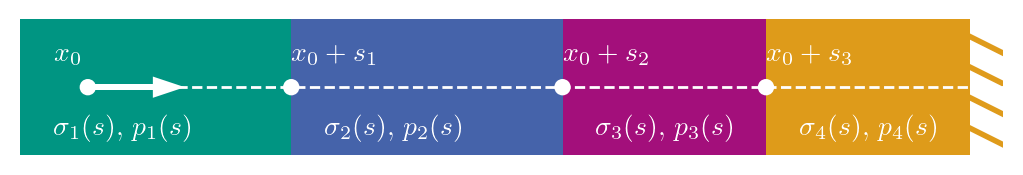

In [3]:
n,m = materials.shape
cmap = plt.cm.tab10  # define the colormap
cmaplist = [cmap(i) for i in range(4)]
cmaplist = [kit.green,kit.blue,kit.purple,kit.orange]
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)

fig, ax = plt.subplots()
ax.imshow(materials,cmap=cmap)
plt.axis('off')
x0,y0 = 0.5,(n-1)/2
plt.arrow(x0,y0,1.0,0,color="white",head_width=0.2,linewidth = 2)
plt.axhline(y0,0.1,1,color="white",linestyle="dashed",linewidth = 1 )
ax.text(x0-0.5,y0-0.4,r"$x_0$",color="white")



circle1 = plt.Circle((x0, y0), 0.1, color='w')
ax.add_artist(circle1)



for i,x in enumerate([0,4,8,11]):
    ax.text(x,n-0.8,r"$\sigma_"+ f"{i+1}" + "(s),\, p_"+f"{i+1}"+"(s)$",color="white")
    if i>0:
        circle1 = plt.Circle((x-0.5, y0), 0.1, color='w')
        ax.text(x-0.5,y0-0.4,r"$x_0 +  s_"+f"{i}" +"$",color="white")
        ax.add_artist(circle1)


z = 0.45
lastcolor = cmaplist[-1]
ax.plot([26*x0,28*x0],[-0.5,0], color = lastcolor,zorder = -100)
ax.plot([26*x0,28*x0],[-0.5+z,0+z], color = lastcolor,zorder = -100)
ax.plot([26*x0,28*x0],[-0.5+2*z,0+2*z], color = lastcolor,zorder = -100)
ax.plot([26*x0,28*x0],[-0.5+3*z,0+3*z], color = lastcolor,zorder = -100)

plt.savefig("traverse.pdf",dpi=400)
import os 
filename = "traverse.pdf"
os.system("pdfcrop --margins '1 1 1 1' {} {}".format(filename,filename))
